# Завдання 6

## Working with `data_2d.csv`dataset

### Identifying Optimal Clusters

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [120]:
# Load the dataset
df_data_2d = pd.read_csv('data_2d.csv', header=None)
df_data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [121]:
df_data_2d_new = df_data_2d.iloc[:, 1:]
print(df_data_2d_new.head())
df_data_2d_new.info()

          1         2
0 -0.768716  0.460860
1  2.687848  2.366961
2 -0.201379  0.470430
3  0.608496  1.225400
4 -0.082282  1.137218
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       200 non-null    float64
 1   2       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [122]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_data_2d)
    inertia.append(kmeans.inertia_)

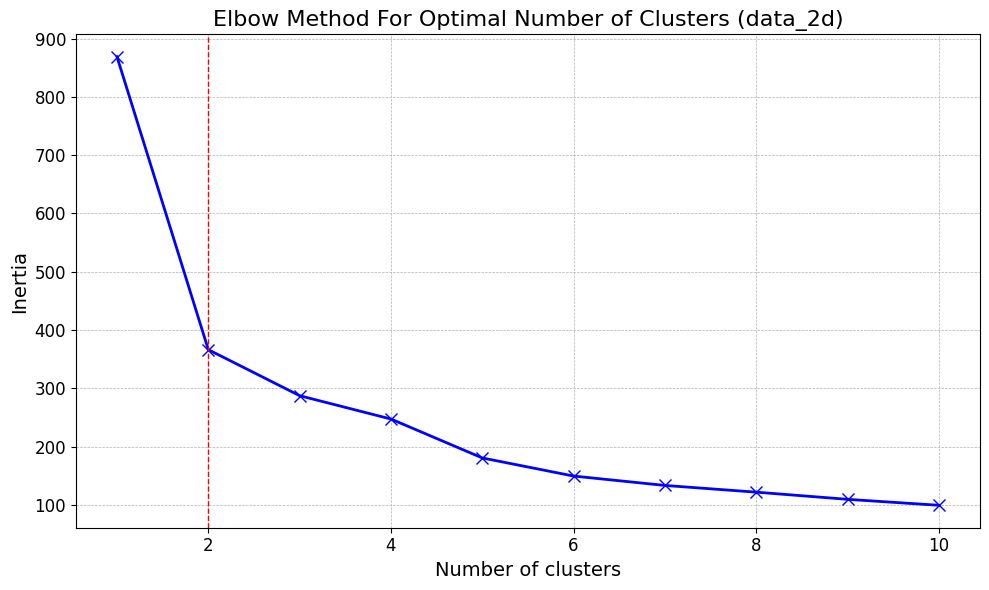

In [123]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-', markersize=8, linewidth=2)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method For Optimal Number of Clusters (data_2d)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=2, color='r', linestyle='--', linewidth=1, label='x=2')
plt.tight_layout()
plt.show()

In [124]:
def optimal_number_of_clusters_silhouette_score(max_clusters=2, dataset=None):
  # Optimal Number of Clusters (Silhouette Score)
  cluster_range = range(2, max_clusters+1)

  best_score = -1

  for k in cluster_range:

      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(dataset)
      cluster_labels = kmeans.predict(dataset)
      score = silhouette_score(dataset, cluster_labels)

      print(f"Silhouette Score (k={k}): {score:.4f}")
      if score > best_score:
          optimal_k = k
          best_score = score

  print(f"Optimal Number of Clusters (Silhouette Score): {optimal_k} with score {best_score:.4f}")

In [125]:
%%time
optimal_number_of_clusters_silhouette_score(10, df_data_2d_new)

Silhouette Score (k=2): 0.4805
Silhouette Score (k=3): 0.3764
Silhouette Score (k=4): 0.3800
Silhouette Score (k=5): 0.3627
Silhouette Score (k=6): 0.3783
Silhouette Score (k=7): 0.3602
Silhouette Score (k=8): 0.3468
Silhouette Score (k=9): 0.3277
Silhouette Score (k=10): 0.3197
Optimal Number of Clusters (Silhouette Score): 2 with score 0.4805
CPU times: user 432 ms, sys: 2.48 ms, total: 434 ms
Wall time: 271 ms


In [126]:
%%time
# Perform K-means clustering with the optimal number of clusters
k_opt = 2
kmeans_opt = KMeans(n_clusters=k_opt, max_iter=300, random_state=42, n_init='auto')
kmeans_opt.fit(df_data_2d)

CPU times: user 8.09 ms, sys: 35 µs, total: 8.12 ms
Wall time: 9.75 ms


KMeans(n_clusters=2, n_init='auto', random_state=42)

### Visualisation

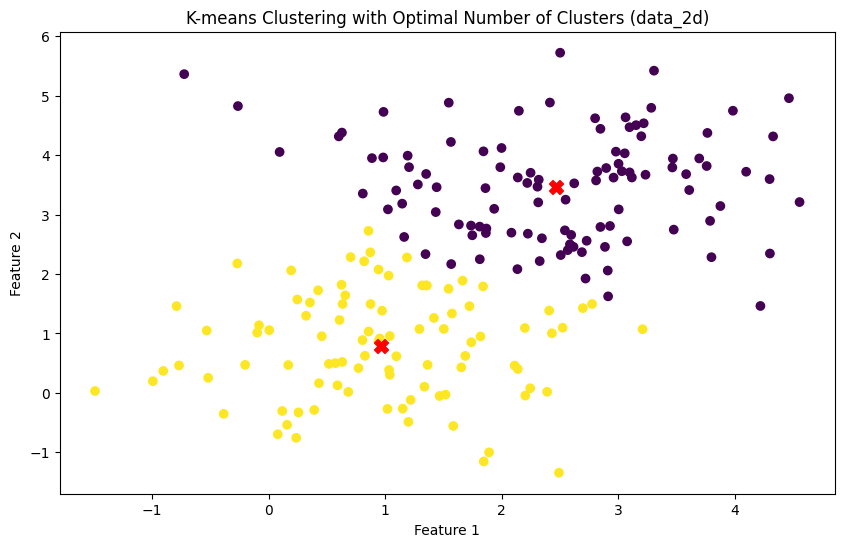

In [127]:
df_data_2d['Cluster'] = kmeans_opt.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df_data_2d.iloc[:, 1], df_data_2d.iloc[:, 2], c=df_data_2d['Cluster'], cmap='viridis', label='Cluster')
plt.scatter(kmeans_opt.cluster_centers_[:, 1], kmeans_opt.cluster_centers_[:, 2], s=100, c='red', marker='X', label = 'Centroid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with Optimal Number of Clusters (data_2d)')
plt.show()


### Summary for `data_2d.csv` dataset
1. **Elbow Method**: The elbow method identified 2 as the optimal number of clusters for data_2d dataset.

2. **Silhouette Score**: The Silhouette Score method also determined 2 as the optimal number of clusters. This suggests a high level of agreement between the two methods, strengthening the confidence in 2 being the suitable number of clusters.

3. **K-means Clustering Plot**: The visualization of the K-means clustering with 2 clusters appears correct. This means the data points are grouped into two distinct clusters with appropriate centroids (cluster centers) representing the average of each cluster.

## Working with MNIST dataset

In [128]:
# Load the dataset
df_data_mnist = pd.read_csv('mnist.csv', header=None)
df_data_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# Fit
%%time
max_clusters = 15
inertia = []
for k in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_data_mnist)
  inertia.append(kmeans.inertia_)
  print(f'Fit {k} clusters')

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
CPU times: user 20.4 s, sys: 8.84 s, total: 29.2 s
Wall time: 18.4 s


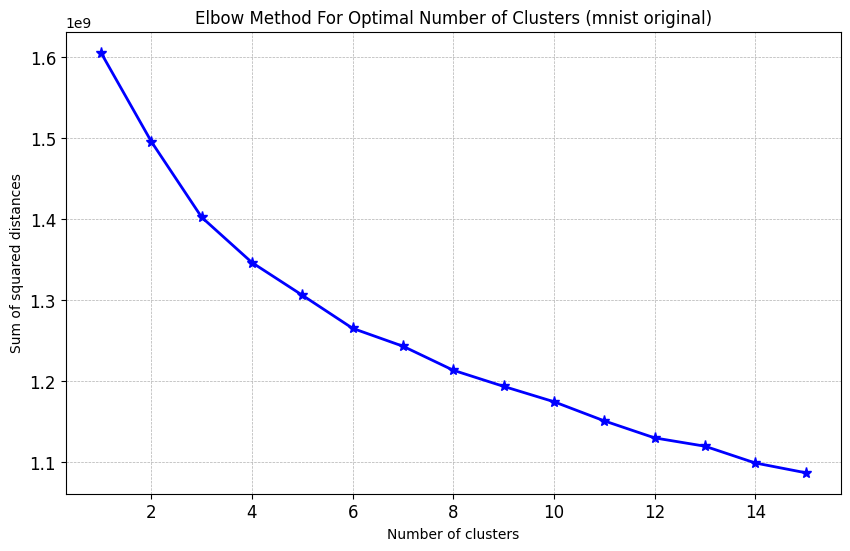

In [130]:
# Elbow methon on original data set
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, 'b*-', markersize=8, linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method For Optimal Number of Clusters (mnist original)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [131]:
# Apply PCA scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data_mnist)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_data_mnist)

In [132]:
# Lets check max 15 clusters
%%time
max_clusters = 15
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
for k in range(2, max_clusters + 1):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pca_data )
  labels = kmeans.labels_
  inertia.append(kmeans.inertia_)
  silhouette_score_val = silhouette_score(pca_data, labels)
  silhouette_scores.append(silhouette_score_val)
  davies_bouldin_scores.append(davies_bouldin_score(pca_data, labels))
  print(f'Fit {k} clusters after PCA')

Fit 2 clusters after PCA
Fit 3 clusters after PCA
Fit 4 clusters after PCA
Fit 5 clusters after PCA
Fit 6 clusters after PCA
Fit 7 clusters after PCA
Fit 8 clusters after PCA
Fit 9 clusters after PCA
Fit 10 clusters after PCA
Fit 11 clusters after PCA
Fit 12 clusters after PCA
Fit 13 clusters after PCA
Fit 14 clusters after PCA
Fit 15 clusters after PCA
CPU times: user 2.41 s, sys: 1.19 s, total: 3.6 s
Wall time: 1.95 s


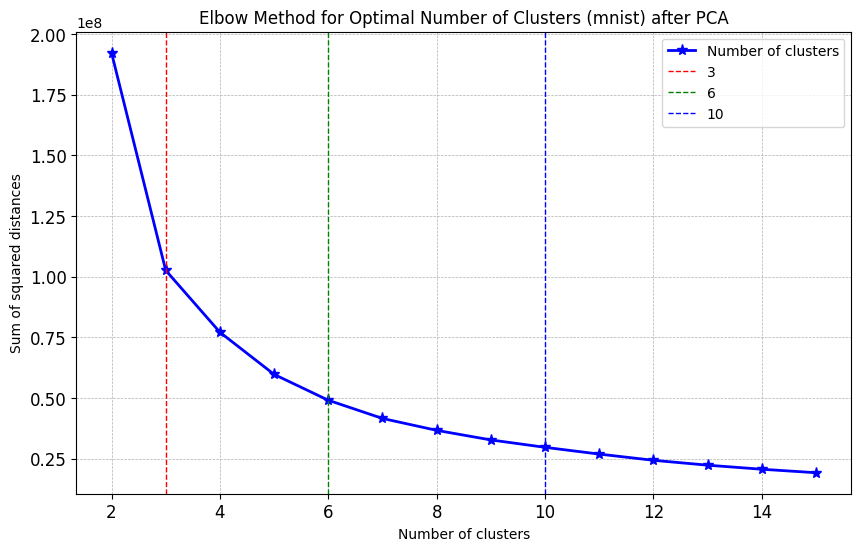

In [133]:
# Elbow method after PCA - visually 3 or 6 or 10 clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), inertia, 'b*-', markersize=8, linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method for Optimal Number of Clusters (mnist) after PCA")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=3, color='r', linestyle='--', linewidth=1, label='x=3')
plt.axvline(x=6, color='g', linestyle='--', linewidth=1, label='x=6')
plt.axvline(x=10, color='b', linestyle='--', linewidth=1, label='x=10')
plt.legend(['Number of clusters', '3', '6', '10'])
plt.show()

In [134]:
def plot_clusters(k=3):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(pca_data)
    cluster_labels = kmeans.labels_
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='x', c='red')
    plt.title(f'K-Means Clustering for mnist data set - ({k} clusters)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

In [135]:
%%time
optimal_number_of_clusters_silhouette_score(max_clusters, pca_data)

Silhouette Score (k=2): 0.3469
Silhouette Score (k=3): 0.4336
Silhouette Score (k=4): 0.4142
Silhouette Score (k=5): 0.3976
Silhouette Score (k=6): 0.4069
Silhouette Score (k=7): 0.3999
Silhouette Score (k=8): 0.3907
Silhouette Score (k=9): 0.3839
Silhouette Score (k=10): 0.3925
Silhouette Score (k=11): 0.3933
Silhouette Score (k=12): 0.3770
Silhouette Score (k=13): 0.3878
Silhouette Score (k=14): 0.3762
Silhouette Score (k=15): 0.3885
Optimal Number of Clusters (Silhouette Score): 3 with score 0.4336
CPU times: user 2.42 s, sys: 1.16 s, total: 3.58 s
Wall time: 1.93 s


In [136]:
def optimal_number_of_clusters_davies_bouldin_index(max_clusters=2, dataset=None):
  # Optimal Number of Clusters (Davies-Bouldin Index)
  cluster_range = range(2, max_clusters+1)

  best_score_db = float('inf')
  optimal_k_db = None

  for k in cluster_range:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(dataset)
      cluster_labels = kmeans.labels_

      db_score = davies_bouldin_score(dataset, cluster_labels)

      print(f"Davies-Bouldin Index (k={k}): {db_score:.4f}")

      if db_score < best_score_db:
          optimal_k_db = k
          best_score_db = db_score

  print(f"Optimal Number of Clusters (Davies-Bouldin Index): {optimal_k_db} with score {best_score_db:.4f}")

In [137]:
%%time
optimal_number_of_clusters_davies_bouldin_index(max_clusters, pca_data)

Davies-Bouldin Index (k=2): 1.1078
Davies-Bouldin Index (k=3): 0.7820
Davies-Bouldin Index (k=4): 0.8126
Davies-Bouldin Index (k=5): 0.8222
Davies-Bouldin Index (k=6): 0.7666
Davies-Bouldin Index (k=7): 0.7908
Davies-Bouldin Index (k=8): 0.8125
Davies-Bouldin Index (k=9): 0.8412
Davies-Bouldin Index (k=10): 0.8003
Davies-Bouldin Index (k=11): 0.8005
Davies-Bouldin Index (k=12): 0.8106
Davies-Bouldin Index (k=13): 0.8186
Davies-Bouldin Index (k=14): 0.8333
Davies-Bouldin Index (k=15): 0.8051
Optimal Number of Clusters (Davies-Bouldin Index): 6 with score 0.7666
CPU times: user 1.02 s, sys: 78.3 ms, total: 1.09 s
Wall time: 605 ms


### Visualisation

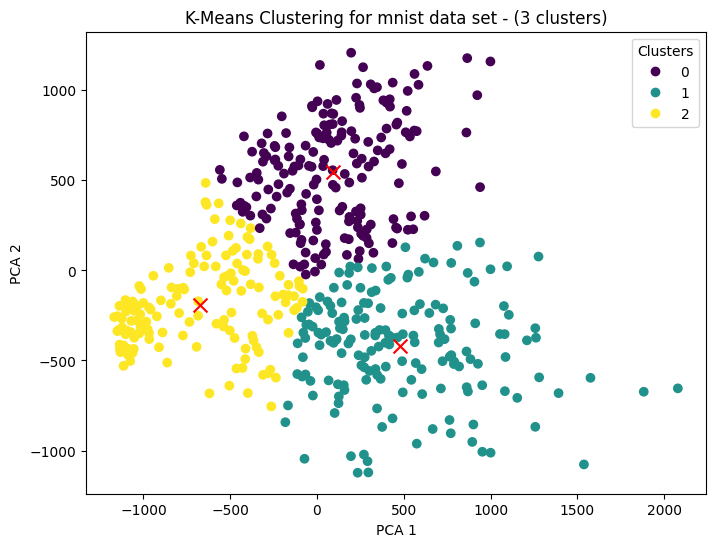

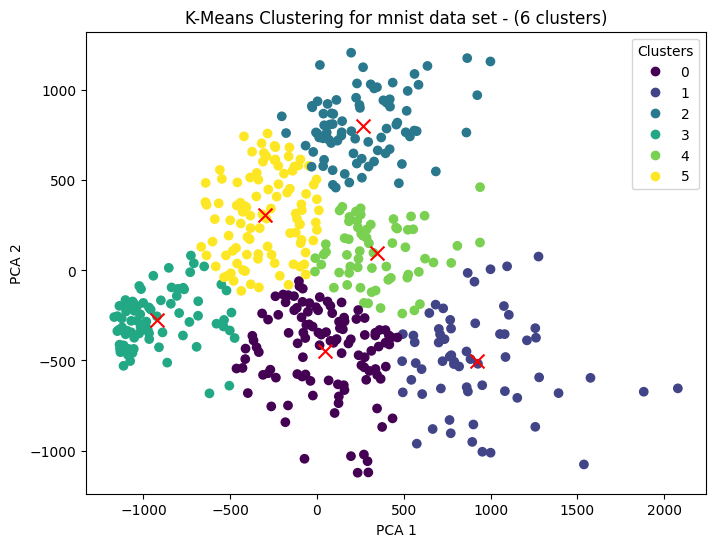

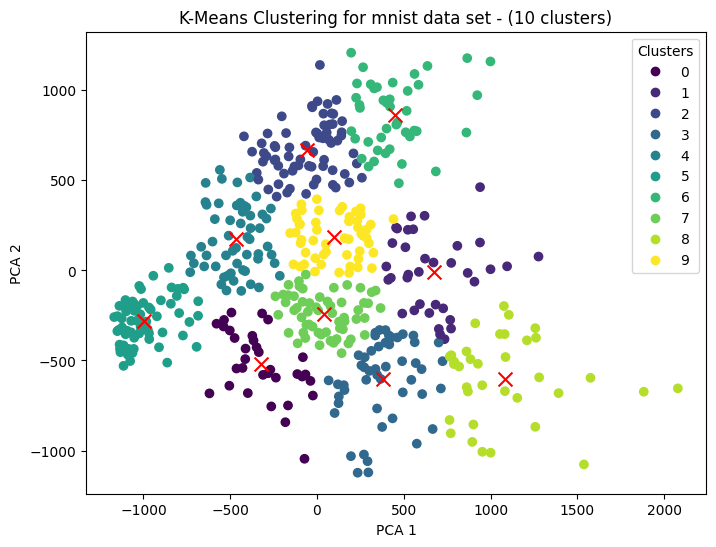

In [138]:
# Plot for 3, 6, 10 clasters
for p in (3, 6, 10):
  plot_clusters(p)

### Summary for MNIST Dataset


**Finding the Best Number of clusters**

We used different methods to figure out how many groups (clusters) best represent the handwritten digits in the MNIST dataset.

* **Elbow Method:** This method didn't give a clear answer when applied directly to the data. It seems the data might be difficult to separate into groups in its original form.
* **Dimensionality Reduction:** To make things easier, we transformed the data into a simpler format using a technique called PCA. This allowed us to see potential groups more clearly.
* **Elbow Method After Reduction:** When we used the elbow method on the transformed data, it suggested 3, 6, or even 10 possible groups might be good choices. However, the method wasn't perfect in this case.
* **Silhouette Score:** This method found that 3 groups yielded the best separation between digits. It considers how similar digits are within a group compared to how different they are from other groups.
* **Davies-Bouldin Index:** This method suggested 6 groups might be optimal. It aims to minimize the spread of digits within a group while maximizing the separation between groups.
* **Visualizations:** We created pictures showing the data divided into 3, 6, and 10 groups. While they all look reasonable, it's hard to say definitively which is best without further analysis.

**Conclusion:**

It wasn't entirely clear how many groups were best for this data. Different methods suggested different numbers. We need to consider other factors or techniques to make a final decision.
